In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

array([[141, 138, 139, ..., 126, 124, 121],
       [145, 149, 141, ..., 126, 123, 119],
       [146, 149, 151, ..., 124, 119, 125],
       ...,
       [102, 103, 107, ..., 139,   0,   0],
       [110, 112, 109, ..., 150,   0,   0],
       [ 88, 132, 115, ..., 143,   0,   0]], dtype=uint8)

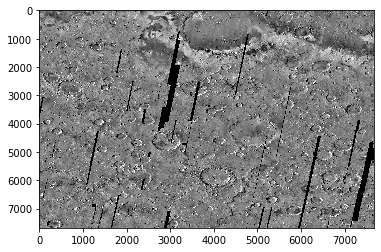

In [25]:
im = np.array(imageio.imread("./assets/thm_dir_N-30_000.png")).astype(np.uint8)
plt.imshow(im, cmap='gray', aspect='auto')

# Observation of Mars Images
- As seen from the image above, these satellite images of mars have black lines with no image data, as well as lots of salt and pepper noise. We will apply various filters in order to try and remove this.

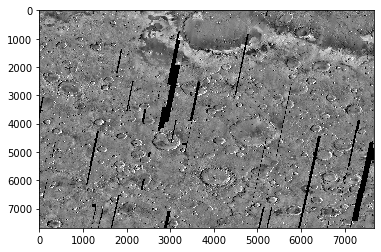

In [32]:
kernel = np.ones((5,5),np.float32)/25
median = cv2.medianBlur(im,5)
plt.imshow(median, cmap = 'gray', aspect='auto')

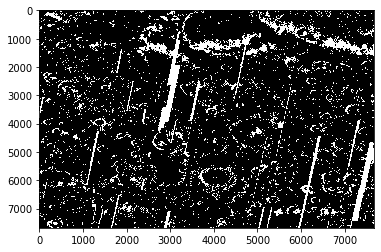

In [33]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
ret,thresh_img = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img, cmap = 'gray', aspect='auto')

In [30]:
median = cv2.medianBlur(morph_img,5)

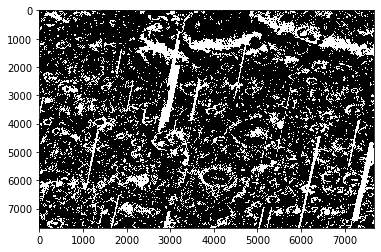

In [31]:
plt.imshow(median, cmap = 'gray', aspect='auto')

In [35]:
from pycda import CDA, load_image

cda = CDA()
image = load_image("./assets/thm_dir_N-30_000.png")
detections = cda.predict(image)

KeyboardInterrupt: 